# From Rows to Lists, Arrays, and DataFrames

## Iterating Over Rows to Analyze Data

So far we have learned how to iterate through the rows of a file in order to process each row, one at a time.  It has its limitations.  In this session we compare working with iteration over rows, to two alternatives: generating lists from the rows, and generating arrays using Numpy.  We close with an introduction to the pandas package, which we will begin using extensively.

But first, let's ceate and then load a simple cvs file with one column, containing 50 random numbers between 0 and 1:

The first task is to calculate a mean value of these numbers.  How can we do that?

In [1]:
import csv
with open('random.csv', 'r') as csvfile:
    i = 0
    cumsum = 0
    itemreader = csv.reader(csvfile)
    for row in itemreader:
        i = i+1
        cumsum = cumsum+float(row[0])
    mean = cumsum/i
    print(mean)

0.5244398067643136


How about computing the min and max values?

In [3]:
import csv
with open('random.csv', 'r') as csvfile:
    i = 0
    cumsum = 0
    min = 1
    max = 0
    itemreader = csv.reader(csvfile)
    for row in itemreader:
        i = i+1
        cumsum = cumsum+float(row[0])
        if float(row[0])>max:
            max = float(row[0])
        if float(row[0])<min:
            min = float(row[0])
    mean = cumsum/i
    print(mean, min, max)

0.5244398067643136 0.025223651492324306 0.9466802390670823


Now let's say we need to compute the median of these numbers.  Remember that a median is the value for which half of the observations are less and half are greater.  Any suggestions on how to code this using our iteration approach, and without resorting to creating a list?

You could iterate through all the values and then iterate through the values again to find the number of values that are above and below it. The median would be the value for which the number of values greater than it is equal to the number of values less than it (give or take one based on even/odd lengths, need to find both of the values that satisfy these criteria and take their mean for the median of an even length list).

## A Note on Documentation

Often we forget how to do something.  In that case, the python docs are our friend.  They can be found here: https://docs.python.org/3.5/

In particular, note the language reference and the library reference.  Let's stop and take a look at each.  

## Using Lists to Analyze Data

Some things that are hard in the row iteration approach above, become easier if we can keep all of the values in one object, like a list.

Let's revisit the problems above, by assembling the values from each row into a single list.

In [7]:
import csv
with open('random.csv', 'r') as csvfile:
    x = []
    itemreader = csv.reader(csvfile)
    for row in itemreader:
        x.append(float(row[0]))
x

[0.4093732012568684,
 0.2605739881846625,
 0.3292968362616999,
 0.15369251587655286,
 0.23329043078616352,
 0.058375483652005955,
 0.5332588448002981,
 0.6687962527527715,
 0.5332264351934751,
 0.8415076456699467,
 0.7979353969441536,
 0.43233771794075715,
 0.34754605289907725,
 0.7466619516233285,
 0.15813005775862143,
 0.9466802390670823,
 0.5818232321654557,
 0.7928258464748998,
 0.41998211394335083,
 0.7683834129272147,
 0.10818497591591836,
 0.2572187926784939,
 0.025223651492324306,
 0.8997766344084331,
 0.9202595213921237,
 0.20619395888024705,
 0.42389286424458084,
 0.02584410137397719,
 0.28533959437594425,
 0.340806200755437,
 0.25722464140666346,
 0.3607105175611516,
 0.5595361970394099,
 0.13022521409946008,
 0.8365338424691172,
 0.7674578942113987,
 0.9166277316995728,
 0.10282324854265201,
 0.8514145952338723,
 0.9289184807191826,
 0.4110611617848009,
 0.0866924684400674,
 0.8206823663887279,
 0.9081734329877278,
 0.7107543205262647,
 0.8664969060282058,
 0.78953865451136

X is now a single list object with all the values in the file, whereas initially we just had each row producing one list with one element in it (from one row), and then printing that, before recreating it with the value from the next row.  The iteration approach kept only one row at a time, and we could not easily do calculations like a median.

Using the list (x), we should now have an easier time with mean and median calculations, using list methods like sum and len, and sort:

In [13]:
mean = sum(x)/len(x)
print(mean)

0.5244398067643136


We can solve the median problem by sorting the list, and getting the value that is halfway through the list:

In [14]:
x.sort()
median = x[int(len(x)/2)]
print(median)

0.5332588448002981


It is also simple to get the min and max, using built-in list methods:

In [15]:
min = x[0]
min

0.025223651492324306

In [16]:
max = x[-1]
max

0.9466802390670823

OK, this is progress.  Can we now do other math on the data, like multiply each value by 5?

In [17]:
y = x*5
y

[0.025223651492324306,
 0.02584410137397719,
 0.058375483652005955,
 0.0866924684400674,
 0.10282324854265201,
 0.10818497591591836,
 0.13022521409946008,
 0.15369251587655286,
 0.15813005775862143,
 0.20619395888024705,
 0.23329043078616352,
 0.2572187926784939,
 0.25722464140666346,
 0.2605739881846625,
 0.28533959437594425,
 0.3292968362616999,
 0.340806200755437,
 0.34754605289907725,
 0.3607105175611516,
 0.4093732012568684,
 0.4110611617848009,
 0.41998211394335083,
 0.42389286424458084,
 0.43233771794075715,
 0.5332264351934751,
 0.5332588448002981,
 0.5595361970394099,
 0.5818232321654557,
 0.6653522724979578,
 0.6687962527527715,
 0.7107543205262647,
 0.7466619516233285,
 0.7674578942113987,
 0.7683834129272147,
 0.7895386545113654,
 0.7928258464748998,
 0.7979353969441536,
 0.8206823663887279,
 0.8365338424691172,
 0.8415076456699467,
 0.8514145952338723,
 0.8664969060282058,
 0.8699019981469763,
 0.8754264422252427,
 0.8997766344084331,
 0.9081734329877278,
 0.91662773169957

Not what we wanted. That just concatenated 5 copies of the list together!

Let's take a different approach.

In [18]:
y = []
for item in range(len(x)):
    y.append(x[item]*5)
y

[0.12611825746162153,
 0.12922050686988595,
 0.2918774182600298,
 0.43346234220033697,
 0.5141162427132601,
 0.5409248795795918,
 0.6511260704973004,
 0.7684625793827643,
 0.7906502887931072,
 1.0309697944012353,
 1.1664521539308175,
 1.2860939633924695,
 1.2861232070333173,
 1.3028699409233124,
 1.4266979718797212,
 1.6464841813084996,
 1.7040310037771849,
 1.7377302644953863,
 1.803552587805758,
 2.046866006284342,
 2.0553058089240044,
 2.099910569716754,
 2.119464321222904,
 2.1616885897037856,
 2.6661321759673755,
 2.6662942240014904,
 2.79768098519705,
 2.9091161608272786,
 3.326761362489789,
 3.3439812637638577,
 3.5537716026313237,
 3.7333097581166426,
 3.837289471056993,
 3.8419170646360734,
 3.947693272556827,
 3.964129232374499,
 3.9896769847207683,
 4.10341183194364,
 4.182669212345586,
 4.207538228349733,
 4.257072976169361,
 4.332484530141029,
 4.349509990734882,
 4.377132211126213,
 4.498883172042166,
 4.540867164938639,
 4.583138658497864,
 4.601297606960618,
 4.64459240

Alright, this is a big improvement over the iteration over rows approach, but it is still a bit tedious.

## Introducing Numpy

Now let's look at the use of arrays, the basic data structure added by Numpy, a library that creates, manipultates, and analyzes n-dimensional array objects, or ndarrays.  We will refer to this datatype as array for short.

When we're working with a library, it is nice to keep the documentation handy.  We can find the Numpy docs here: http://www.numpy.org/.  If you're unfamiliar with a new package, you might want to start from the tutorial to cover the basics.  

Arrays can be created from any sequence-like object, such as a list of integers or floats, for example.  We start by creating one from a list of floats.  

First, we have to import Numpy and will assign it a shorter name of np

In [19]:
import numpy as np

data1 = [3.2, 4.5, 8.0, 9.9]
arr1 = np.array(data1)
arr1

array([3.2, 4.5, 8. , 9.9])

Notice that if we pass a nested list of equal-length lists, we create a two-dimensional array:

In [20]:
data2 = [[1.1, 2.2 ,3.3], [1.2, 2.3, 3.4]]
arr2 = np.array(data2)
arr2

array([[1.1, 2.2, 3.3],
       [1.2, 2.3, 3.4]])

We can see its type, number of dimensions, size (number of elements), and shape (length of each dimension) as follows:

In [21]:
type(arr2)

numpy.ndarray

In [22]:
arr2.ndim

2

In [23]:
arr2.size

6

In [24]:
arr2.shape

(2, 3)

We can check the data type of the contents of an array, or 'cast' it to a specified data type, like this:

In [25]:
arr2.dtype

dtype('float64')

In [26]:
arr3 = arr2.astype(np.int8)
arr3.dtype

dtype('int8')

The data type for the elements in an array are required to be the same.  Among other types, they can be int8, int16, int32, int64, float16, float32, float64, bool. They can also be strings of fixed length, but Numpy is mostly used for arrays of numeric data.

Recall the range method to generate a range of integers?  We can use an analogous method called arange in Numpy to create a multi-dimensional array:

In [27]:
arr = np.arange(15).reshape(3,5)
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

Below, we load the same csv file with random numbers that we loaded earlier, with a built-in Numpy method, genfromtext.  

In [28]:
a = np.genfromtxt('random.csv')
a

array([0.4093732 , 0.26057399, 0.32929684, 0.15369252, 0.23329043,
       0.05837548, 0.53325884, 0.66879625, 0.53322644, 0.84150765,
       0.7979354 , 0.43233772, 0.34754605, 0.74666195, 0.15813006,
       0.94668024, 0.58182323, 0.79282585, 0.41998211, 0.76838341,
       0.10818498, 0.25721879, 0.02522365, 0.89977663, 0.92025952,
       0.20619396, 0.42389286, 0.0258441 , 0.28533959, 0.3408062 ,
       0.25722464, 0.36071052, 0.5595362 , 0.13022521, 0.83653384,
       0.76745789, 0.91662773, 0.10282325, 0.8514146 , 0.92891848,
       0.41106116, 0.08669247, 0.82068237, 0.90817343, 0.71075432,
       0.86649691, 0.78953865, 0.66535227, 0.87542644, 0.869902  ])

Numpy Arrays are objects of type ndarray, often just called arrays. They are a special data type that support fast, vectorized calculations.  Numpy calculations are actually computed in low-level C code behind the scenes, avoiding the need for iterative loops in Python, which are well known to be very slow compared to compiled languages like C, C++ or Fortran.

Let's have a look at some of the built-in methods to explore Numpy arrays.

First, instead of len, we have a size method that tells us how many elements are in the array.

In [29]:
np.size(a)

50

Next, we can explore the shape of an array.  If it is a single column, it shows as (length,).  If it is a single row, it shows up as (,length).

In [30]:
np.shape(a)

(50,)

A lot of mathematical methods are readily built in to Numpy.  Here are a few for mean, standard deviation, variance, median, min, max, sum.

In [31]:
np.mean(a)

0.5244398067643137

In [32]:
np.std(a)

0.29945520509855145

In [33]:
np.var(a)

0.08967341986061551

In [34]:
np.median(a)

0.5332426399968866

In [35]:
np.min(a)

0.025223651492324306

In [36]:
np.max(a)

0.9466802390670823

In [37]:
np.sum(a)

26.221990338215683

Much easier than coding for loops and counters, don't you think?  And a lot faster on large datasets, too.

Numpy also integrates very well with Matplotlib to generate charts.  Let's look at a sorted list of the elements in the array.

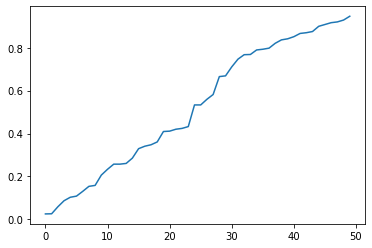

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(np.sort(a))

(array([6., 4., 5., 4., 5., 3., 3., 2., 9., 9.]),
 array([0.02522365, 0.11736931, 0.20951497, 0.30166063, 0.39380629,
        0.48595195, 0.5780976 , 0.67024326, 0.76238892, 0.85453458,
        0.94668024]),
 <BarContainer object of 10 artists>)

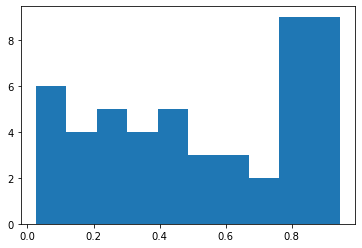

In [39]:
plt.hist(a)

The distribution above doesn't look very random, does it?  It seems to be intended as a uniform distribution from 0 to 1, but has a disproportionate samping from above 0.8.  Let's try generating larger samples and see if it looks more uniform.

(array([9., 4., 3., 4., 6., 4., 5., 4., 3., 8.]),
 array([0.00670273, 0.1059851 , 0.20526748, 0.30454985, 0.40383223,
        0.5031146 , 0.60239698, 0.70167935, 0.80096173, 0.9002441 ,
        0.99952648]),
 <BarContainer object of 10 artists>)

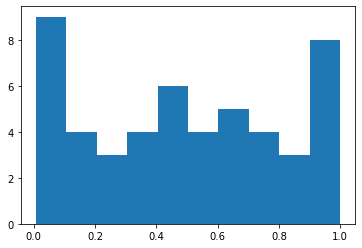

In [40]:
b = np.random.uniform(0,1,50)
plt.hist(b)

And here is a normal distribution.

(array([ 5.,  6.,  5., 11.,  9.,  4.,  4.,  2.,  2.,  2.]),
 array([-1.86754886, -1.40292849, -0.93830812, -0.47368775, -0.00906738,
         0.45555298,  0.92017335,  1.38479372,  1.84941409,  2.31403446,
         2.77865483]),
 <BarContainer object of 10 artists>)

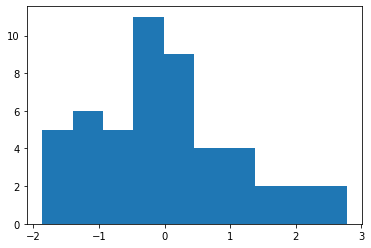

In [42]:
b = np.random.randn(50)
plt.hist(b)

The efficiency and productivity of coding using arrays becomes even more obvious when we consider calculations like an element by element calculation -- multiplying each element by 5, for example.  No loops needed when the calculations are vectorized.  If we say, a*5 and a is an array, Numpy will perform an element by element multiplication, using fast C code to do the math.

In [43]:
b = a*5
b

array([2.04686601, 1.30286994, 1.64648418, 0.76846258, 1.16645215,
       0.29187742, 2.66629422, 3.34398126, 2.66613218, 4.20753823,
       3.98967698, 2.16168859, 1.73773026, 3.73330976, 0.79065029,
       4.7334012 , 2.90911616, 3.96412923, 2.09991057, 3.84191706,
       0.54092488, 1.28609396, 0.12611826, 4.49888317, 4.60129761,
       1.03096979, 2.11946432, 0.12922051, 1.42669797, 1.704031  ,
       1.28612321, 1.80355259, 2.79768099, 0.65112607, 4.18266921,
       3.83728947, 4.58313866, 0.51411624, 4.25707298, 4.6445924 ,
       2.05530581, 0.43346234, 4.10341183, 4.54086716, 3.5537716 ,
       4.33248453, 3.94769327, 3.32676136, 4.37713221, 4.34950999])

Similarly, multiplying two arrays together produces an element by element multiplication, in this case, instead of each element of a being multiplied by a constant (5), it is being multiplied by the corresponding value (same index position) in array b.  In other words, the first element of each array get multiplied together, the second element of each array, the third, and so on.

This works as long as the arrays are of the same length, or if one is an even multiple of the other, in which case the shorter one gets repeated to make the lengths match.  That process is called broadcasting, and it is how we were able to multiply a initially by a constant. The constant was broadcast to the length of a.

In [44]:
c = a*b
c

array([8.37932090e-01, 3.39494017e-01, 5.42182032e-01, 1.18106947e-01,
       2.72122125e-01, 1.70384855e-02, 1.42182498e+00, 2.23644214e+00,
       1.42165216e+00, 3.54067559e+00, 3.18350449e+00, 9.34579512e-01,
       6.03941294e-01, 2.78752035e+00, 1.25025576e-01, 4.48101738e+00,
       1.69259137e+00, 3.14286411e+00, 8.81924880e-01, 2.95206535e+00,
       5.85199451e-02, 3.30807537e-01, 3.18116297e-03, 4.04798996e+00,
       4.23438793e+00, 2.12579743e-01, 8.98425802e-01, 3.33958788e-03,
       4.07093421e-01, 5.80744332e-01, 3.30822581e-01, 6.50560387e-01,
       1.56540378e+00, 8.47930319e-02, 3.49894435e+00, 2.94495810e+00,
       4.20103199e+00, 5.28631022e-02, 3.62453406e+00, 4.31444772e+00,
       8.44856394e-01, 3.75779204e-02, 3.36759773e+00, 4.12389492e+00,
       2.52585852e+00, 3.75408444e+00, 3.11685643e+00, 2.21346823e+00,
       3.83185728e+00, 3.78364743e+00])

### More Advanced Uses of Numpy

Numpy is a very powerful libary for mathematical and scientific computing, well beyond the limited functionality above.  It forms the foundation for Scipy, a large libray for scientific computing, and many other numeric libraries, including Pandas, which we will get to shortly.

But first, a glimpse of some more advanced uses of numpy.  To get a sense of the types of things Numpy can do, we can check out the list of Numpy functions by category from their docs.  Those are here: https://docs.scipy.org/doc/numpy/reference/routines.html.  Let's take a look...

Now let's look at two examples.  

#### Linear Algebra

You noticed that when we did array calculations in Numpy it was elementwise?  Those of you who have done any linear algebra and worked with matrix (arra) libraries might be perplexed that standard matrix operations do not result from a * b for example.  Not to worry.  Numpy can do linear algebra quite well - it just uses separate syntax for it.

For example, a matrix multiplication is called a dot product.

In [45]:
d = np.array([[1.0, 2.0], [3.0, 4.0]])
c = np.dot(d,d)
c

array([[ 7., 10.],
       [15., 22.]])

In [48]:
np.transpose(c)

array([[ 7., 15.],
       [10., 22.]])

There is way more to Numpy than we have covered here but if you need to do serious number crunching and advanced computation in Python, you will generally find Numpy to be a core part of the solution.  

#### Generating Fractals

Here is a fun example of using Numpy to generate a Mandlebrot set from a Scipy tutorial (don't ask me to explain it).  If you get curious about the theory and math behind it, Wikipedia has a good page on it. https://en.wikipedia.org/wiki/Mandelbrot_set

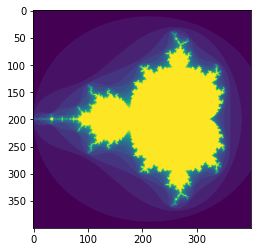

In [49]:
import numpy as np
import matplotlib.pyplot as plt
def mandelbrot( h,w, maxit=20 ):
    """Returns an image of the Mandelbrot fractal of size (h,w)."""

    y,x = np.ogrid[ -1.4:1.4:h*1j, -2:0.8:w*1j ]
    c = x+y*1j
    z = c
    divtime = maxit + np.zeros(z.shape, dtype=int)

    for i in range(maxit):
        z = z**2 + c
        diverge = z*np.conj(z) > 2**2            # who is diverging
        div_now = diverge & (divtime==maxit)  # who is diverging now
        divtime[div_now] = i                  # note when
        z[diverge] = 2                        # avoid diverging too much

    return divtime

plt.imshow(mandelbrot(400,400))
plt.show()

# Introducing Pandas

We have moved from processing file with iterators over rows, to lists with iterators, to using Numpy arrays to do vectorized operations that are much faster and are also less complex to read, understand and to code. We moved from operating on one item in a list at a time, to operating on a whole array at one time. Now we want to be able to move to handling the whole table of data at once.

One of the problems we did not attempt to deal with using arrays, or lists, was how to keep rows of data together so that if we skip a missing value in one variable like price, it does not cause the other variables to be mis-aligned due to changes in the length of the array or list for one entry. This is one of many things that the pandas library does for us.
We skip forward a bit to Chapter 6 in Python for Data Analysis in order to learn how to load our data using pandas. 

We also want to keep the Pandas docs handy here: http://pandas.pydata.org/

Here is how we start with loading data:

In [50]:
import pandas as pd
df = pd.read_csv('ca_tracts_pop_cleaned.csv')
df[:5]

,POPGROUP,label,GEOIDLONG,GEOID,geodisplay,Population
0,1,Total population,1400000US06001400100,6001400100,"Census Tract 4001, Alameda County, California",2937
1,1,Total population,1400000US06001400200,6001400200,"Census Tract 4002, Alameda County, California",1974
2,1,Total population,1400000US06001400300,6001400300,"Census Tract 4003, Alameda County, California",4865
3,1,Total population,1400000US06001400400,6001400400,"Census Tract 4004, Alameda County, California",3703
4,1,Total population,1400000US06001400500,6001400500,"Census Tract 4005, Alameda County, California",3517


Notice a few things that have happened here.

1. The pd.read_csv has enough built-in smarts to read the first row of the file, get the variable names from it.
1. It then read all rows in the file, and used them to create a pandas DataFrame, which is like a set of Numpy arrays we can treat as a table.
1. It created an automatic unique index, beginning with zero.
1. It inferred the type of each variable from the data.  All were interpreted as strings, except the index that pandas created automatically.

Let's explore this pandas DataFrame to learn some of its features.  Note that a pandas Series is like one column of this DataFrame, coupled with its own index column.  So the main difference between a Series and a DataFrame is that the latter has multiple columns. Columns can be of different data types, but within a column, must be consistent.

In [51]:
df.shape

(8000, 6)

In [52]:
df.columns

Index(['POPGROUP', 'label', 'GEOIDLONG', 'GEOID', 'geodisplay', 'Population'], dtype='object')

In [53]:
df.dtypes

POPGROUP       int64
label         object
GEOIDLONG     object
GEOID          int64
geodisplay    object
Population     int64
dtype: object

We can select subsets of the rows by indexing, and select specific columns by their name:

In [54]:
df['Population'][:10]

0    2937
1    1974
2    4865
3    3703
4    3517
5    1571
6    4206
7    3594
8    2302
9    5678
Name: Population, dtype: int64

We can get all of our statistics on the Population column in one short command:

In [55]:
df['Population'].describe()

count     8000.000000
mean      4656.669625
std       1953.036084
min        112.000000
25%       3372.000000
50%       4422.000000
75%       5662.000000
max      37452.000000
Name: Population, dtype: float64

Or get these values 'a la carte'.  You might recognize that these are essentially Numpy functions, but that in pandas we can now deal with multiple data types.

In [56]:
df['Population'].min()

112

In [57]:
df['Population'].max()

37452

In [58]:
df['Population'].median()

4422.0

We can also do some plotting of the data without much effort:

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline

array([[<AxesSubplot:title={'center':'Population'}>]], dtype=object)

<Figure size 432x288 with 0 Axes>

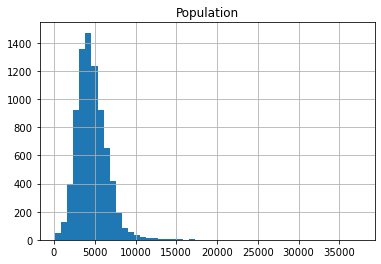

In [60]:
plt.figure()
df.hist(column='Population', bins=50)

Note that we can use string operations we have already learned, and apply those to columns that are of type string.  The syntax is a bit different when used with pandas DataFrames.  Here, we create a State column and add it to df by splitting geodisplay and getting its third element.  Note that these string methods are reviewed in Pandas forData Analysis pages 206-206.  More advanced regex methods and other vectorized string methods are covered in pages 207-212.

In [61]:
df['State'] = df['geodisplay'].str.split(',').str[2]
df[:5]

,POPGROUP,label,GEOIDLONG,GEOID,geodisplay,Population,State
0,1,Total population,1400000US06001400100,6001400100,"Census Tract 4001, Alameda County, California",2937,California
1,1,Total population,1400000US06001400200,6001400200,"Census Tract 4002, Alameda County, California",1974,California
2,1,Total population,1400000US06001400300,6001400300,"Census Tract 4003, Alameda County, California",4865,California
3,1,Total population,1400000US06001400400,6001400400,"Census Tract 4004, Alameda County, California",3703,California
4,1,Total population,1400000US06001400500,6001400500,"Census Tract 4005, Alameda County, California",3517,California


Next let's create a Tract column with just the tract number, and remove the 'Census Tract ' from it.

In [62]:
df['Tract']=df['geodisplay'].str.split(',').str[0].str.strip('Census Tract ')
df[:5]

,POPGROUP,label,GEOIDLONG,GEOID,geodisplay,Population,State,Tract
0,1,Total population,1400000US06001400100,6001400100,"Census Tract 4001, Alameda County, California",2937,California,4001
1,1,Total population,1400000US06001400200,6001400200,"Census Tract 4002, Alameda County, California",1974,California,4002
2,1,Total population,1400000US06001400300,6001400300,"Census Tract 4003, Alameda County, California",4865,California,4003
3,1,Total population,1400000US06001400400,6001400400,"Census Tract 4004, Alameda County, California",3703,California,4004
4,1,Total population,1400000US06001400500,6001400500,"Census Tract 4005, Alameda County, California",3517,California,4005


Here is another way to do the last step, using replace.

In [63]:
df['Tract']=df['geodisplay'].str.split(',').str[0].str.replace('Census Tract ', '')
df[:5]

,POPGROUP,label,GEOIDLONG,GEOID,geodisplay,Population,State,Tract
0,1,Total population,1400000US06001400100,6001400100,"Census Tract 4001, Alameda County, California",2937,California,4001
1,1,Total population,1400000US06001400200,6001400200,"Census Tract 4002, Alameda County, California",1974,California,4002
2,1,Total population,1400000US06001400300,6001400300,"Census Tract 4003, Alameda County, California",4865,California,4003
3,1,Total population,1400000US06001400400,6001400400,"Census Tract 4004, Alameda County, California",3703,California,4004
4,1,Total population,1400000US06001400500,6001400500,"Census Tract 4005, Alameda County, California",3517,California,4005
